# Project 2 - Closing Price Stock Classifier - Version 1.0

    Introduction

Welcome to my second repository! This one is a new take on my first project, which tried to predict the closing price of a stock given today's opening price, historical data, and engineered features using an automated regression optimization tool, TPOT, to find the best regression pipeline for the dataset. That project can be found here:

https://github.com/windowshopr/Project-1-Closing-Price-Stock-Regressor-Version-1.0

At the end of that project, I noticed that the regressor was unable to predict the closing price very accurately because the stock I was predicting, CLVS, absolutely tanked in the last 90 days from running that model. So low that that price hadn't been seen before during the training process. I had this idea before, but now it seems even more relevant, what if instead of trying to predict the actual closing price, we just simply tried to predict a Buy or Sell signal for that day? Would it have a decent accuracy score using the exact same work as before with feature engineering, etc.? Let's find out!

    DISCLAIMER: This project is merely a compilation of various Python and machine learning skills that I have picked up 
    over the past few months and years. This tool is not actually meant to be used for stock advisement, it is for academic
    and future development purposes only.
    
    You've been warned. Now enjoy!

### The Environment and Installing the Dependencies

First thing's first, if you want to run this project, you need to have the appropriate dependencies installed. Everything listed below are the versions of each dependency as of this writing. I'll explain how to install them all at the bottom of the list. Now I can't speak for other versions, but you need to be running ... Python 3.6 on Windows 10 ..., as that's what I'm running on my machine. Here are the dependencies you'll need:

    DateTime==4.3
    pandas==0.23.0
    pandas-datareader==0.7.0
    seaborn==0.8.1
    matplotlib==2.1.2
    numpy==1.14.5
    bs4==0.0.1
    requests==2.22.0
    feature-selector==1.0.0
    featuretools==0.9.1
    dask==2.2.0
    dask-ml==1.0.0
    sklearn==0.0
    TPOT==0.10.2
    ta-lib==0.4.18

Again, this is all in Python 3.6 and Windows 10. All of the other modules used in this project (like "os" and "warnings" should be included in your Python package already. If you run into something I've missed, let me know, but this should be a complete list. There are two ways to install all of these packages:


1. Install them all at once using the Pip installer by typing the following command into your command prompt:

        pip install DateTime==4.3 pandas==0.23.0 pandas-datareader==0.7.0 seaborn==0.8.1 matplotlib==2.1.2 numpy==1.14.5 bs4==0.0.1 requests==2.22.0 feature-selector==1.0.0 featuretools==0.9.1 dask==2.2.0 dask-ml==1.0.0 sklearn TPOT==0.10.2 TA-Lib
    
   Or
            
        pip3 install DateTime==4.3 pandas==0.23.0 pandas-datareader==0.7.0 seaborn==0.8.1 matplotlib==2.1.2 numpy==1.14.5 bs4==0.0.1 requests==2.22.0 feature-selector==1.0.0 featuretools==0.9.1 dask==2.2.0 dask-ml==1.0.0 sklearn TPOT==0.10.2 TA-Lib

(Depending on how you have installed your Pip installer. Notice the 3 after pip)


2. Install them all from the provided "requirements.txt" file by typing in the following command into your command prompt:

        pip install -r requirements.txt
        
   Or
           
        pip3 install -r requirements.txt

(One of those two ways should create the environment needed to run this project. Otherwise each module will need to be installed manually as needed).

### References and Resources Before We Get Started

Before I forget and start going down the code wormhole, I wanted to take some time and reference some various websites, other's projects and the tools that I'm using in the following code. I want to thank everyone involved in my learning process and I urge you to check them out:

1. The motivation and skeleton for my project - https://gogul09.github.io/software/regression-example-boston-housing-prices
(That article taught me more in one reading than any other)


1. TPOT (automated machine learning) - https://epistasislab.github.io/tpot/
2. FeatureTools (feature engineering) - https://www.featuretools.com/
3. Feature-Selector (take a guess :D) - https://github.com/WillKoehrsen/feature-selector
4. Dask (parallel computing) - https://docs.dask.org/en/latest/
5. TA-Lib (technical indicators) - https://mrjbq7.github.io/ta-lib/index.html


1. Medium (Great resource for learning. Sign up for emails based on what you read!) - https://medium.com/topic/artificial-intelligence
2. Towards Data Science (Another awesome resource) - https://towardsdatascience.com/
3. Machine Learning Mastery (see above) - https://machinelearningmastery.com/
4. Stack Overflow (duh!) - https://stackoverflow.com/
5. Upwork (in a real pinch, pay someone to teach you something) - www.upwork.com
6. Udemy (I received great value from this course) - https://www.udemy.com/the-data-science-course-complete-data-science-bootcamp/


Without further adu, let's get started.

### The Code

Keep in mind, I have already run every cell in this notebook. If you want to re-run it, you are more than welcome to, however I have made references to values and numbers pertaining to this run only, like prices and accuracy values and such. My breakdowns of each step will then vary if you're looking up a different stock, so just keep that in mind if you're re-running it for the first time. Adjust as you need.

ALSO, if you do want to start this script over again, make sure you click "Kernel > Restart and Clear Output" to make sure you're starting fresh!!!

Most the project is recycled from that first one so a lot of the comments will be the same so hopefully it'll be easy to follow along.

# 1. GET THE STOCK'S HISTORICAL DATA

In [1]:
# In-notebook plotting. Take this out if running from a .py file
%matplotlib inline

# Display Future Warnings that repeat "needlessly" only once (for now)
import warnings
warnings.filterwarnings("once")

# Let's begin. Ask for which stock ticker you want to predict.
# A list of stocks that are able to be run so far are:

ticker_input = input('Which stock ticker would you like to predict? ') 
print('Getting the historical data for: ',ticker_input)

Which stock ticker would you like to predict? NFLX
Getting the historical data for:  NFLX


In [2]:
# Import first group of dependencies, and then
# download the historical daily data from Yahoo Finance
# using Pandas Datareader. A different source could be
# used as I've read that getting historical data using
# this method is temperamental (and deprecated), but works for now
from datetime import datetime
from pandas_datareader import data as web
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import seaborn as sns
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import time

# Downloading historical data as a Pandas dataframe.
# Think of a dataframe as an Excel file, with rows
# and columns of data, sometimes with a header row.
ex = 'yahoo'
start = datetime(2000, 1, 1) # Edit this to whatever you want, but the older the better
end = datetime.now() # Today
dataset = web.DataReader(ticker_input, ex, start, end)

# Now let's look at the top 5 rows of the dataset
print(dataset.head(5))

print('Done!')

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\

            High  Low  Open  Close         Volume  Adj Close
Date                                                        
2002-05-23  1.24 1.15  1.16   1.20 104,790,000.00       1.20
2002-05-24  1.23 1.20  1.21   1.21  11,104,800.00       1.21
2002-05-28  1.23 1.16  1.21   1.16   6,609,400.00       1.16
2002-05-29  1.16 1.09  1.16   1.10   6,757,800.00       1.10
2002-05-30  1.11 1.07  1.11   1.07  10,154,200.00       1.07
Done!


C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\pandas_datareader\data.py:310: ResourceWarning: unclosed <socket.socket fd=1524, family=AddressFamily.AF_INET, type=SocketKind.SOCK_STREAM, proto=0, laddr=('10.8.8.80', 54704), raddr=('216.115.100.124', 443)>
  session=session).read()


# 2. ADJUST THE HISTORICAL DATASET AND ADD TECHNICAL INDICATORS

In [3]:
# We should have a Date index column, which isn't exactly a part of 
# the dataframe itself. The rest of the columns are the stock's
# historical data per day.

# Now that we have the dataframe, let's modify it for our model.
# You'll notice the data has a Close and an Adjusted Close column.
# We're going to use the Adj Close for various reasons, so let's
# get rid of the Close column:
dataset = dataset.drop(['Close'],axis=1)

# Now let's shift the daily data so that for the current day,
# we have new columns containing the previous day's OHLC data.
dataset['PrevOpen'] = dataset['Open'].shift(1)
dataset['PrevHigh'] = dataset['High'].shift(1)
dataset['PrevLow'] = dataset['Low'].shift(1)
dataset['PrevAdjClose'] = dataset['Adj Close'].shift(1)
dataset['PrevVol'] = dataset['Volume'].shift(1)

# Now that we have that data, we need to drop the High, Low and 
# Volume columns because we won't know what those values will be
# until the trading day is over. We'll only know (roughly) where the 
# stock will open, and then all of what happened yesterday.
dataset = dataset.drop(['High'],axis=1)
dataset = dataset.drop(['Low'],axis=1)
dataset = dataset.drop(['Volume'],axis=1)

# Now just for fun, let's add in a couple moving averages based on the 
# opening prices. We could add in way more indicators here in the future.
# The model can determine which ones are important. You'll see that later.
dataset['9MA'] = dataset['Open'].rolling(window=9).mean()
dataset['20MA'] = dataset['Open'].rolling(window=20).mean()

In [4]:
# This next section I've added as part of an upgrade process to my original
# code. We're going to include the TA-Lib module, which is a great tool to
# calculate techincal indicators based on previous stock data.
import talib

# I'm not going to get too detailed with the technical indicators, but you can
# check out https://mrjbq7.github.io/ta-lib/doc_index.html to learn more about them,
# but for now, let's just add a bunch (mostly momentum and volatility ones) to our dataframe and let the model decide
# which ones are important enough to keep for training. Some would argue that too many
# adds noise to the data, and they'd be right, but we have a step to determine feature
# importance in a little while to combat this. We'll also deal with some of these
# indicators correlating to one another in a second.

# Overlap Studies
# Bollinger Bands
upperband, middleband, lowerband = talib.BBANDS(dataset['PrevAdjClose'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
dataset['UpperBB'] = upperband
dataset['MidBB'] = middleband
dataset['LowerBB'] = lowerband

# SAR - Parabolic SAR
sar = talib.SAR(dataset['PrevHigh'], dataset['PrevLow'], acceleration=0.02, maximum=0.2)
dataset['SAR'] = sar


# Momentum Indicators
# ADX - Average Directional Movement Index
real = talib.ADX(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['ADX'] = real

# APO - Absolute Price Oscillator
real = talib.APO(dataset['PrevAdjClose'], fastperiod=12, slowperiod=26, matype=0)
dataset['APO'] = real

# CCI - Commodity Channel Index
real = talib.CCI(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['CCI'] = real

# DX - Directional Movement Index
real = talib.DX(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['DX'] = real

# MACD - Moving Average Convergence/Divergence
macd, macdsignal, macdhist = talib.MACD(dataset['PrevAdjClose'], fastperiod=12, slowperiod=26, signalperiod=9)
dataset['MACD'] = macd
dataset['MACDSIGNAL'] = macdsignal
dataset['MACDHIST'] = macdhist

# MOM - Momentum
real = talib.MOM(dataset['PrevAdjClose'], timeperiod=10)
dataset['MOM'] = real

# ROC - Rate of change : ((price/prevPrice)-1)*100
real = talib.ROC(dataset['PrevAdjClose'], timeperiod=10)
dataset['ROC'] = real

# RSI - Relative Strength Index
real = talib.RSI(dataset['PrevAdjClose'], timeperiod=14)
dataset['RSI'] = real

# STOCH - Stochastic
slowk, slowd = talib.STOCH(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
dataset['STOCHSLOWK'] = slowk
dataset['STOCHSLOWD'] = slowd

# ULTOSC - Ultimate Oscillator
real = talib.ULTOSC(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod1=7, timeperiod2=14, timeperiod3=28)
dataset['ULTOSC'] = real


# Volume Indicator Functions
# OBV - On Balance Volume
real = talib.OBV(dataset['PrevAdjClose'], dataset['PrevVol'])
dataset['OBV'] = real


# Volatility Indicator Functions
# ATR - Average True Range
real = talib.ATR(dataset['PrevHigh'], dataset['PrevLow'], dataset['PrevAdjClose'], timeperiod=14)
dataset['ATR'] = real


# Statistic Functions
# BETA - Beta
real = talib.BETA(dataset['PrevHigh'], dataset['PrevLow'], timeperiod=5)
dataset['BETA'] = real

# LINEARREG - Linear Regression
real = talib.LINEARREG(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG'] = real

# LINEARREG_ANGLE - Linear Regression Angle
real = talib.LINEARREG_ANGLE(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG_ANGLE'] = real

# LINEARREG_SLOPE - Linear Regression Slope
real = talib.LINEARREG_SLOPE(dataset['PrevAdjClose'], timeperiod=14)
dataset['LINEARREG_SLOPE'] = real

# STDDEV - Standard Deviation
real = talib.STDDEV(dataset['PrevAdjClose'], timeperiod=5, nbdev=1)
dataset['STDDEV'] = real

# TSF - Time Series Forecast
real = talib.TSF(dataset['PrevAdjClose'], timeperiod=14)
dataset['TSF'] = real

# VAR - Variance
#real = talib.VAR(dataset['PrevAdjClose'], timeperiod=5, nbdev=1)
#dataset['VAR'] = real

In [5]:
# Now let's quickly delete highly correlated features, but make sure it doesn't
# get rid of the features we know we want to keep!

# Create correlation matrix
#corr_matrix = dataset.drop(['Open','PrevOpen','PrevHigh','PrevLow','PrevAdjClose','PrevVol','9MA','20MA','Adj Close'],axis=1).corr().abs()

# Select upper triangle of correlation matrix
#upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.98
#to_drop = [column for column in upper.columns if any(upper[column] >= 0.98)]

# Drop features 
#dataset.drop(dataset[to_drop], axis=1)

In [6]:
# Phewf! Now print the new head of the dataframe and check it out so far
print(dataset.head(5))
print('Done!')

            Open  Adj Close  PrevOpen  PrevHigh  PrevLow  PrevAdjClose  \
Date                                                                     
2002-05-23  1.16       1.20       nan       nan      nan           nan   
2002-05-24  1.21       1.21      1.16      1.24     1.15          1.20   
2002-05-28  1.21       1.16      1.21      1.23     1.20          1.21   
2002-05-29  1.16       1.10      1.21      1.23     1.16          1.16   
2002-05-30  1.11       1.07      1.16      1.16     1.09          1.10   

                  PrevVol  9MA  20MA  UpperBB ...   STOCHSLOWD  ULTOSC  \
Date                                          ...                        
2002-05-23            nan  nan   nan      nan ...          nan     nan   
2002-05-24 104,790,000.00  nan   nan      nan ...          nan     nan   
2002-05-28  11,104,800.00  nan   nan      nan ...          nan     nan   
2002-05-29   6,609,400.00  nan   nan      nan ...          nan     nan   
2002-05-30   6,757,800.00  nan   nan 

In [7]:
# Reshape the dataframe to put Open and Adj Close to the far 
# right so when we export the predictions dataset, the predictions
# column will be right next to them for easier analysis
opencolumn = dataset['Open']
adjclosecolumn = dataset['Adj Close']

dataset = dataset.drop(['Open'],axis=1)
dataset = dataset.drop(['Adj Close'],axis=1)

dataset['Open'] = opencolumn
dataset['Adj Close'] = adjclosecolumn

In [8]:
# Now, because we're predicting Buy and Sell signals for each day,
# we need to make a new column that shows whether or not the stock
# closed higher or lower than that day's open; something for our
# classifier to predict.
dataset['DailyResult'] = 0

# Now, if we predicted the price to close higher than the open,
# put a 1, otherwise put a 0.
dataset.loc[dataset['Open'] < dataset['Adj Close'], 'DailyResult'] = 1
dataset.loc[dataset['Open'] >= dataset['Adj Close'], 'DailyResult'] = 0

In [9]:
# Let's preview the new dataset so far. Note the Not a Number (nan)
# values. We'll handle these in a second.
print(dataset.head(5))

# Now save our initial dataset to a .csv file for later review if we want
if not os.path.exists("./historical data/"):
    os.makedirs("./historical data/")
dataset.to_csv('./historical data/' + ticker_input + '_historical_data.csv')

print('Done.')

            PrevOpen  PrevHigh  PrevLow  PrevAdjClose        PrevVol  9MA  \
Date                                                                        
2002-05-23       nan       nan      nan           nan            nan  nan   
2002-05-24      1.16      1.24     1.15          1.20 104,790,000.00  nan   
2002-05-28      1.21      1.23     1.20          1.21  11,104,800.00  nan   
2002-05-29      1.21      1.23     1.16          1.16   6,609,400.00  nan   
2002-05-30      1.16      1.16     1.09          1.10   6,757,800.00  nan   

            20MA  UpperBB  MidBB  LowerBB     ...       ATR  BETA  LINEARREG  \
Date                                          ...                              
2002-05-23   nan      nan    nan      nan     ...       nan   nan        nan   
2002-05-24   nan      nan    nan      nan     ...       nan   nan        nan   
2002-05-28   nan      nan    nan      nan     ...       nan   nan        nan   
2002-05-29   nan      nan    nan      nan     ...       nan 

# 4. EXPLORE AND PREPROCESS THE DATASET

In [10]:
# Let's change the dataframe's variable to df, an industry standard.
df = pd.DataFrame(dataset)
df.columns = dataset.columns

In [11]:
# Print the "feature" (or column) names.
print("[INFO] Dataset names : {}".format(df.columns))

[INFO] Dataset names : Index(['PrevOpen', 'PrevHigh', 'PrevLow', 'PrevAdjClose', 'PrevVol', '9MA',
       '20MA', 'UpperBB', 'MidBB', 'LowerBB', 'SAR', 'ADX', 'APO', 'CCI', 'DX',
       'MACD', 'MACDSIGNAL', 'MACDHIST', 'MOM', 'ROC', 'RSI', 'STOCHSLOWK',
       'STOCHSLOWD', 'ULTOSC', 'OBV', 'ATR', 'BETA', 'LINEARREG',
       'LINEARREG_ANGLE', 'LINEARREG_SLOPE', 'STDDEV', 'TSF', 'Open',
       'Adj Close', 'DailyResult'],
      dtype='object')


In [12]:
# Show the "shape" of the dataset.
print("[INFO] Dataset shape (Rows, Columns) : {}".format(df.shape))

[INFO] Dataset shape (Rows, Columns) : (4340, 35)


In [13]:
# Print the dataframe's type (in case you need to know for later)
print("[INFO] df type : {}".format(type(df)))

[INFO] df type : <class 'pandas.core.frame.DataFrame'>


In [14]:
# Now check if any columns have blank values
print('[INFO] Checking if any columns with NaN values...')
print(pd.isnull(df).any())

[INFO] Checking if any columns with NaN values...
PrevOpen            True
PrevHigh            True
PrevLow             True
PrevAdjClose        True
PrevVol             True
9MA                 True
20MA                True
UpperBB             True
MidBB               True
LowerBB             True
SAR                 True
ADX                 True
APO                 True
CCI                 True
DX                  True
MACD                True
MACDSIGNAL          True
MACDHIST            True
MOM                 True
ROC                 True
RSI                 True
STOCHSLOWK          True
STOCHSLOWD          True
ULTOSC              True
OBV                 True
ATR                 True
BETA                True
LINEARREG           True
LINEARREG_ANGLE     True
LINEARREG_SLOPE     True
STDDEV              True
TSF                 True
Open               False
Adj Close          False
DailyResult        False
dtype: bool


Notice anything? Remember that we shifted the data down one day to put the
previous day's data in the current day's row? Well since we don't know the
previous day's data from the day before the start date of the dataset, 
Pandas has no choice but to put 'nan' in there to fill the empty space.
We also experience this when creating our 9 and 20 period moving averages
and other indicators because we need the previous day's of data before the value for
them would start to show up.

There are various ways to deal with 'nan' values in a dataset:
1. Replace the missing value with a large negative number (e.g. -999), but this is an old way of doing things.
2. Replace the missing value with mean of the column.
3. Replace the missing value with median of the column.

For this application, our nan values are only in the top few rows due to 
our shifting, so we can just drop these rows from our dataset because 30
days max missing from a dataset out of many years of stock data won't make too much
difference. If your stock's ETF ticker symbol doesn't date back as far as
your stock's historical data, you will have more nan values to deal. The
newbie way to do this for now is just dropping every row that has a nan
values, so you could employ the commented out code in place of this one,
that choice will be up to you, but we don't want any nan values in our data.

In [15]:
# Drop all Nan rows of the dataset to get rid of
# the ones caused by the shifting of data
df = df.dropna(how='any')
# df = df.iloc[20:] # to drop the first X amount of rows instead

# Now check if we have any nan values. All Falses? Great!
print(pd.isnull(df).any())

PrevOpen           False
PrevHigh           False
PrevLow            False
PrevAdjClose       False
PrevVol            False
9MA                False
20MA               False
UpperBB            False
MidBB              False
LowerBB            False
SAR                False
ADX                False
APO                False
CCI                False
DX                 False
MACD               False
MACDSIGNAL         False
MACDHIST           False
MOM                False
ROC                False
RSI                False
STOCHSLOWK         False
STOCHSLOWD         False
ULTOSC             False
OBV                False
ATR                False
BETA               False
LINEARREG          False
LINEARREG_ANGLE    False
LINEARREG_SLOPE    False
STDDEV             False
TSF                False
Open               False
Adj Close          False
DailyResult        False
dtype: bool


In [16]:
# Now let's check the dtypes of the dataset
print('[INFO] Dataset types:')
print(df.dtypes)

[INFO] Dataset types:
PrevOpen           float64
PrevHigh           float64
PrevLow            float64
PrevAdjClose       float64
PrevVol            float64
9MA                float64
20MA               float64
UpperBB            float64
MidBB              float64
LowerBB            float64
SAR                float64
ADX                float64
APO                float64
CCI                float64
DX                 float64
MACD               float64
MACDSIGNAL         float64
MACDHIST           float64
MOM                float64
ROC                float64
RSI                float64
STOCHSLOWK         float64
STOCHSLOWD         float64
ULTOSC             float64
OBV                float64
ATR                float64
BETA               float64
LINEARREG          float64
LINEARREG_ANGLE    float64
LINEARREG_SLOPE    float64
STDDEV             float64
TSF                float64
Open               float64
Adj Close          float64
DailyResult          int64
dtype: object


In [17]:
# All numbers? Good. Machine learning algorithms want numbers
# to deal with. If we had categorical (word) values, we'd have
# to one-hot encode them. Homework; research what that is :D

# Print a statistical summary of the dataset for reference
print('[INFO] Print a statistical summary of dataset:')
print(df.describe(include='all'))

[INFO] Print a statistical summary of dataset:
       PrevOpen  PrevHigh  PrevLow  PrevAdjClose        PrevVol      9MA  \
count  4,306.00  4,306.00 4,306.00      4,306.00       4,306.00 4,306.00   
mean      62.66     63.62    61.62         62.66  18,230,439.85    62.45   
std       99.01    100.45    97.37         98.96  20,083,694.03    98.74   
min        0.38      0.41     0.35          0.37     285,600.00     0.46   
25%        3.69      3.79     3.60          3.70   7,201,075.00     3.70   
50%       12.26     12.53    11.98         12.30  12,139,500.00    12.23   
75%       81.24     82.41    80.66         81.98  21,770,350.00    80.57   
max      421.38    423.21   413.08        418.97 323,414,000.00   406.51   

          20MA  UpperBB    MidBB  LowerBB     ...           ATR     BETA  \
count 4,306.00 4,306.00 4,306.00 4,306.00     ...      4,306.00 4,306.00   
mean     62.05    67.40    61.98    56.55     ...          2.14     0.65   
std      98.27   106.24    98.16    90.3

[INFO] Printing the Pearson Correlation tables...
PEARSON CORRELATION
                 PrevOpen  PrevHigh  PrevLow  PrevAdjClose  PrevVol   9MA  \
PrevOpen             1.00      1.00     1.00          1.00    -0.16  1.00   
PrevHigh             1.00      1.00     1.00          1.00    -0.16  1.00   
PrevLow              1.00      1.00     1.00          1.00    -0.16  1.00   
PrevAdjClose         1.00      1.00     1.00          1.00    -0.16  1.00   
PrevVol             -0.16     -0.16    -0.16         -0.16     1.00 -0.16   
9MA                  1.00      1.00     1.00          1.00    -0.16  1.00   
20MA                 1.00      1.00     1.00          1.00    -0.16  1.00   
UpperBB              1.00      1.00     1.00          1.00    -0.16  1.00   
MidBB                1.00      1.00     1.00          1.00    -0.16  1.00   
LowerBB              1.00      1.00     1.00          1.00    -0.17  1.00   
SAR                  0.99      0.99     0.99          0.99    -0.16  1.00   
ADX   

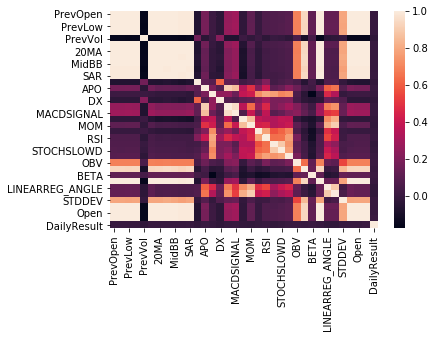

In [18]:
# It's good to know what these values are. You can see if there's
# a huge outlier from human error that needs to be dealt with
# in your dataset, etc.

# Finding correlation between attributes and plotting heatmaps,
# then saving them in our main directory for later if wanted.
print('[INFO] Printing the Pearson Correlation tables...')
print("PEARSON CORRELATION")
print(df.corr(method="pearson"))
sns.heatmap(df.corr(method="pearson"))

# Create the plots directory
if not os.path.exists("./plots/"):
    os.makedirs("./plots/")

plt.savefig("./plots/heatmap_pearson.png")
plt.show() # comment this out if using .py file
plt.clf()
#plt.close() # uncomment this if using .py file

In [19]:
# Generate a report with lots of statistical information and export to .txt file
# for later reference if needed.

# create directory to store stats summaries in
if not os.path.exists("./statistical summaries/"):
    os.makedirs("./statistical summaries/")

file_report = 'statistical summaries/' + ticker_input + ".txt"
with open(file_report, "w") as f:
    f.write("Features shape : {}".format(df.drop("Adj Close", axis=1).shape))
    f.write("\n")

    f.write("Target shape   : {}".format(df["Adj Close"].shape))
    f.write("\n")

    f.write("\nColumn names")
    f.write("\n")
    f.write(str(df.columns))
    f.write("\n")

    f.write("\nStatistical summary")
    f.write("\n")
    f.write(str(df.describe(include='all')))
    f.write("\n")

    f.write("\nDatatypes")
    f.write("\n")
    f.write(str(df.dtypes))
    f.write("\n")

    f.write("\nPEARSON correlation")
    f.write("\n")
    f.write(str(df.corr(method="pearson")))
    f.write("\n")

    f.write("\nMissing Values")
    f.write("\n")
    f.write(str(pd.isnull(df).any()))

From here, we can see which features are highly correlated to
each other. This is important because if some features are 
almost identically correlated to eachother, we won't need both
of them in our datasets. We will deal with this more during 
the feature selection phase, but this gives a nice visual
of how your feautres correlate to each other. The images created
are saved in the project's main directory for your review.

Let's create some more visualizations. You can review how to 
read these plots online and at the links given below :)
Then save those plot images too. We won't show them here,
just see the saved images in the working directory.

In [20]:
# Univariates
sns.set(color_codes=True)
colors = ["y", "b", "g", "r"]

cols = list(df.columns.values)
if not os.path.exists("./plots/univariate/box"):
    os.makedirs("./plots/univariate/box")

# Box plots
# https://www.khanacademy.org/math/ap-statistics/summarizing-quantitative-data-ap/stats-box-whisker-plots/v/reading-box-and-whisker-plots
for i, col in enumerate(cols):
    sns.boxplot(df[col], color=random.choice(colors), orient="v")
    plt.savefig("./plots/univariate/box/box_" + str(i) + ".png")
    plt.clf()
    plt.close()

if not os.path.exists("plots/univariate/density"):
    os.makedirs("./plots/univariate/density")

# Kernel Density plots
# https://en.wikipedia.org/wiki/Kernel_density_estimation
for i, col in enumerate(cols):
    sns.distplot(df[col], color=random.choice(colors))
    plt.savefig("./plots/univariate/density/density_" + str(i) + ".png")
    plt.clf()
    plt.close()
# Commented out as I get "LinAlgError: singular matrix" error after I added in 
# all those technical indicators.

# Bivariates
if not os.path.exists("./plots/multivariate"):
    os.makedirs("./plots/multivariate")

# Scatter plots
for i, col in enumerate(cols):
    try:
        if (i == len(cols) - 1):
            pass
        else: 
            sns.jointplot(x=col, y="Adj Close", data=df);
            plt.savefig("./plots/multivariate/target_vs_" + str(i) + ".png")
            plt.clf()
            plt.close()
    except:
        pass


# Pairplot
#sns.pairplot(df) 
#plt.savefig("plots/pairplot.png")
#plt.clf()
#plt.close()
# I've commented this out because trying to create a pairplot
# image of a large dataset can take a while and make a big image file, so feel
# free to add this back in if you want but expect it to be slow.

# An alternative would be...
#sns.pairplot(df.sample(1000)) 
#plt.savefig("plots/pairplot.png")
#plt.clf()
#plt.close()

print('Done visualizing!')

Done visualizing!


# 5. AUTOMATED FEATURE ENGINEERING! WOOO!

We will be using the Featuretools module for this step of the process.
Feature Engineering, in a very basic sense, is the creation of new
features, using the current features of your dataset. To do this
part manually, data scientists would have to have some domain knowledge
of the field they're working with. If you had a dataset of sales numbers
and geographical locations, adding another column or feature of say, the ratio
of sales per geographical location would show the relationshiop between sales and
the location, giving our model more data to work with. Automatic Feature 
Engineering takes care of this step for us by creating lots of new features
using the entire dataset to bring to light hidden relationships between the
features, effectively mitigating the need to know "everything" about the 
field you're trying to figure out. More feature engineering can be found here:
https://www.analyticsvidhya.com/blog/2018/08/guide-automated-feature-engineering-featuretools-python/

In our example, if we have the 9 MA and 20 MA values, using Deep Feature Synthesis,
it would create added columns like "9MA > 20MA", "9MA < 20MA", "Adj Close > 9MA",
the list can go on and on, as we'll see in a minute.

In [21]:
# "Reset" the index column for Featuretools to use now "Date" column as the index, then we'll revert
# the Date column back to an index after feature engineering is done (creating a new, bigger dataset).
# But first, save the date column for later re-instating.

# These if statements are a way of preventing over additions of indexes when re-running the 
# notebook. Just ignore it and move on.
if "level_0" in df:
    df = df.drop('level_0',axis=1)
if "index" in df:
    df = df.drop('index',axis=1)
if 'Date' in df:
    date_values = df['Date']
df = df.reset_index()
print(df.head())

        Date  PrevOpen  PrevHigh  PrevLow  PrevAdjClose      PrevVol  9MA  \
0 2002-07-12      1.15      1.28     1.13          1.27 2,529,800.00 1.16   
1 2002-07-15      1.28      1.28     1.21          1.21 2,837,800.00 1.19   
2 2002-07-16      1.24      1.25     1.08          1.14 4,239,200.00 1.20   
3 2002-07-17      1.15      1.16     1.10          1.13 1,941,800.00 1.20   
4 2002-07-18      1.14      1.16     1.08          1.09 1,261,400.00 1.19   

   20MA  UpperBB  MidBB     ...       ATR  BETA  LINEARREG  LINEARREG_ANGLE  \
0  1.06     1.29   1.06     ...      0.08  0.60       1.26             1.43   
1  1.07     1.31   1.06     ...      0.08  0.31       1.27             1.40   
2  1.08     1.31   1.07     ...      0.09  0.46       1.26             1.20   
3  1.09     1.32   1.08     ...      0.09  0.05       1.24             0.91   
4  1.10     1.31   1.09     ...      0.09  0.05       1.20             0.57   

   LINEARREG_SLOPE  STDDEV  TSF  Open  Adj Close  DailyResult 

In [22]:
# Let's do it! Auto Feature Engineering using Feature Tools
import featuretools as ft
#print(ft.list_primitives().to_string()) # To get full list of primitives that could be used

print('Adding the engineered features to the dataframe. This may take a hot minute...')

# Define the function. We do this in case there's a runtime error, it won't
# start the program over again, just stays within the function
def feature_engineering_dataset(df):
    es = ft.EntitySet(id = 'stockdata')

# Now we make sure that the dataframe we feed to the featuretools doesn't include
# our label. Notice the drop? Because we don't want to engineer features using the
# label that hasn't happened yet, right?
    adj_close = list(df['Adj Close'])
    dailyresult = list(df['DailyResult'])
    dataframe = df.drop(['Adj Close', 'DailyResult'],axis=1)
    es.entity_from_dataframe(entity_id = 'data', dataframe = dataframe, index = 'Date')

# Pesky warnings
    warnings.filterwarnings("ignore", category=RuntimeWarning) 
    warnings.filterwarnings("once", category=ImportWarning)

# Run deep feature synthesis with transformation primitives
# Depending on how many features are being added to the dataset,
# you may need to tweak the chunk_size and n_jobs variables below.
# n_jobs should be tweaked for how many processors are on your
# machine, and the chunk_size should be big enough to run quickly,
# but small enough that each chunk can fit into memory. See the 
# Featuretools website for more information on this.
    feature_matrix, feature_defs = ft.dfs(n_jobs=1,entityset = es, target_entity = 'data', 
                                           chunk_size=0.01,max_depth=2,verbose=True,
                    #agg_primitives = ['avg_time_between',
                     #   'trend','std',],    # review "print(ft.list_primitives().to_string())" for more
                    trans_primitives = [
                        'less_than_equal_to',
                        'greater_than_equal_to'
                    ])
    warnings.filterwarnings("once", category=RuntimeWarning) 

# Now re-add the Adj Close column because featuretools...
    feature_matrix['Adj Close'] = adj_close
    feature_matrix['DailyResult'] = dailyresult

# Return our new dataset!
    return(feature_matrix)

# Now run that defined function
df = feature_engineering_dataset(df)

# Now save a new .csv file with our new features in it for review later if we want
if not os.path.exists("./historical data/"):
    os.makedirs("./historical data/")
dataset.to_csv('./historical data/' + ticker_input + '_with_feature_matrix.csv')

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Loc

Adding the engineered features to the dataframe. This may take a hot minute...
Built 2145 features
Elapsed: 04:00 | Remaining: 00:00 | Progress: 100%|████████████████████████████████████████| Calculated: 101/101 chunks


In [23]:
print(df.head())
print('Behold our new dataset! Huzzah! (Remember, theres not really 5 rows, we just printed the head.)')

            PrevOpen  PrevHigh  PrevLow  PrevAdjClose      PrevVol  9MA  20MA  \
Date                                                                            
2002-07-12      1.15      1.28     1.13          1.27 2,529,800.00 1.16  1.06   
2002-07-15      1.28      1.28     1.21          1.21 2,837,800.00 1.19  1.07   
2002-07-16      1.24      1.25     1.08          1.14 4,239,200.00 1.20  1.08   
2002-07-17      1.15      1.16     1.10          1.13 1,941,800.00 1.20  1.09   
2002-07-18      1.14      1.16     1.08          1.09 1,261,400.00 1.19  1.10   

            UpperBB  MidBB  LowerBB     ...       PrevHigh >= LowerBB  \
Date                                    ...                             
2002-07-12     1.29   1.06     0.82     ...                      True   
2002-07-15     1.31   1.06     0.82     ...                      True   
2002-07-16     1.31   1.07     0.83     ...                      True   
2002-07-17     1.32   1.08     0.85     ...                      Tr

# 6. AUTOMATED FEATURE SELECTION

Now, as you'll see, we have way more columns in our dataset than when we 
first started. Surely we don't need ALL of these columns before training
our model do we? Nope!

So what we'll do now is utilize the Feature-Selector module to help us
perform automated feature selection. What's going to happen here is,
it's going to find features that have more than 60% missing values,
have a correlation threshold of more than 98% (remember our correlation
heatmap from before?), and maybe most importantly, get rid of any 
features that don't add up to a max feature importance of 99%! This uses
lightgbm to train a quick model to determine which features are the least
important, then get rid of them, leaving us with an awesome dataset!

https://github.com/WillKoehrsen/feature-selector

In [24]:
# Let's go!
#df = df.set_index('Date')

def feature_removal_func(df):
    
# Name all the feature columns and target label column for FeatureSelector...
# Save the open price as FS removes it due to high correlation, but we want to keep it    
    openprice = df["Open"]
    features = df.drop(["Adj Close","DailyResult",'PrevOpen','PrevHigh','PrevLow','PrevAdjClose','PrevVol'], axis=1)
    label = df["DailyResult"]
    adjclose = df["Adj Close"]
    preop = df['PrevOpen']
    prehi = df['PrevHigh']
    prelo = df['PrevLow']
    preadjclose = df['PrevAdjClose']
    prevol = df['PrevVol']

# Now, drop all columns of low importance, crazy high correlation, etc.
    from feature_selector import FeatureSelector
    fs = FeatureSelector(data = features, labels = label)
    fs.identify_all(selection_params = {'missing_threshold': 0.6,    
                                    'correlation_threshold': 0.98, 
                                    'task': 'classification',    
                                    'eval_metric': 'auc', 
                                    'cumulative_importance': 0.99})
    all_to_remove = fs.check_removal()
    print(all_to_remove[:])
    df = fs.remove(methods = 'all')

# Re-Add the Open. And Adj Close to the df because FeatureTools removes it once you assign it as the label for some reason
    df['PrevOpen'] = preop
    df['PrevHigh'] = prehi
    df['PrevLow'] = prelo
    df['PrevAdjClose'] = preadjclose
    df['PrevVol'] = prevol
    df['Open'] = openprice
    df["Adj Close"] = adjclose
    df['DailyResult'] = label
    return(df)

df = feature_removal_func(df)

print(df.head())
print('Our wonderful, new dataset has been created!')

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\lightgbm\__init__.py:27: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\windowshopr\\AppData\\Local\\Programs\\Python\\Python36\\lib\\site-packages\\lightgbm\\VERSION.txt' mode='r' encoding='cp1252'>
  __version__ = open(os.path.join(dir_path, 'VERSION.txt')).read().strip()


0 features with greater than 0.60 missing values.

704 features with a single unique value.

1192 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[41]	valid_0's auc: 0.533937
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[8]	valid_0's auc: 0.524578
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.532763
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[4]	valid_0's auc: 0.525532
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.507496
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[7]	valid_0's auc: 0.513732
Training until validation scores don't improve for 10

['PrevVol <= TSF', 'OBV >= STDDEV', '20MA >= STOCHSLOWD', 'STDDEV <= MACD', 'MOM >= DX', 'LowerBB <= MidBB', 'LINEARREG_ANGLE >= UpperBB', 'APO >= PrevAdjClose', 'PrevAdjClose <= MACDHIST', 'MOM <= 20MA', 'Open', 'Open >= PrevVol', 'ADX <= STOCHSLOWD', 'APO >= CCI', 'APO >= MACDHIST', 'MACD >= ADX', 'STOCHSLOWK <= MACD', 'BETA <= OBV', 'PrevHigh <= APO', 'PrevLow <= PrevHigh', 'MACD >= MACDHIST', 'PrevAdjClose >= 20MA', '20MA <= DX', '20MA >= PrevVol', '9MA >= PrevLow', 'Open <= ATR', 'LINEARREG_ANGLE <= STDDEV', 'LINEARREG_SLOPE >= PrevAdjClose', 'ADX >= LINEARREG', 'DX >= Open', 'DX >= ULTOSC', 'MACD >= DX', 'ROC >= BETA', 'LINEARREG >= MidBB', 'UpperBB <= ADX', '9MA >= MACDHIST', 'ULTOSC <= ROC', 'STOCHSLOWD >= MACDSIGNAL', 'LowerBB <= BETA', 'MACD >= TSF', 'STDDEV >= TSF', 'SAR >= MACDHIST', 'DX >= BETA', 'ULTOSC <= SAR', 'SAR <= OBV', 'STOCHSLOWK <= MOM', 'UpperBB <= MACDSIGNAL', 'Open >= LINEARREG', 'LowerBB <= PrevVol', 'PrevVol <= MACDSIGNAL', 'CCI >= LINEARREG_SLOPE', 'UpperBB

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 2034 features.
            9MA   ADX  APO    CCI    DX  MACD  MACDSIGNAL  MACDHIST   MOM  \
Date                                                                        
2002-07-12 1.16 23.49 0.04  91.31 28.10  0.02       -0.03      0.05  0.28   
2002-07-15 1.19 23.84 0.06  82.68 28.28  0.02       -0.02      0.04  0.26   
2002-07-16 1.20 22.32 0.07  27.82  2.62  0.02       -0.01      0.03  0.14   
2002-07-17 1.20 20.91 0.08   1.23  2.62  0.02       -0.01      0.02  0.10   
2002-07-18 1.19 19.59 0.09 -28.09  2.34  0.01       -0.00      0.01 -0.08   

             ROC     ...       UpperBB <= PrevAdjClose  Open <= PrevHigh  \
Date                 ...                                                   
2002-07-12 28.40     ...                         False              True   
2002-07-15 28.01     ...                         False              True   
2002-07-16 14.37     ...       

In [25]:
# TA-Lib also has candlestick patterns available too, so let's add those in.
# We add them in after because their values don't (necessarily) need to be considered
# in the feature selection part. We either see a candlestick pattern or we don't.
# There's a lot of them:
# CDL2CROWS - Two Crows
#integer = talib.CDL2CROWS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL2CROWS'] = integer
# CDL3BLACKCROWS - Three Black Crows
#integer = talib.CDL3BLACKCROWS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3BLACKCROWS'] = integer
# CDL3INSIDE - Three Inside Up/Down
#integer = talib.CDL3INSIDE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3INSIDE'] = #integer
# CDL3LINESTRIKE - T#hree-Line Strike
#integer = talib.CDL3LINESTRIKE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3LI#NESTRIKE'#] = integer
# CDL3OUTSI#DE - Thre#e Outside Up/Down
#integer = talib.CDL3OUTSIDE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3OU#TSIDE'] =# integer
# CDL3STARS#INSOUTH -# Three Stars In The South
#integer = talib.CDL3STARSINSOUTH(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3ST#ARSINSOUTH'] = integer
# CDL3WHITE#SOLDIERS - Three Advancing White Soldiers
#integer = talib.CDL3WHITESOLDIERS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDL3WH#ITESOLDIERS'] = integer
# CDLABANDO#NEDBABY - Abandoned Baby
#integer = talib.CDLABANDONEDBABY(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
#df['CDLABA#NDONEDBABY'] = integer
# CDLADVANC#EBLOCK - Advance Block
#integer = talib.CDLADVANCEBLOCK(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLADV#ANCEBLOCK'] = integer
# CDLBELTHO#LD - Belt-hold
#integer = talib.CDLBELTHOLD(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLBEL#THOLD'] = integer
# CDLBREAKAWAY - Breakaway
#integer = talib.CDLBREAKAWAY(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLBREAKAWAY'] = integer
# CDLCLOSINGMARUBOZU - Closing Marubozu
#integer = talib.CDLCLOSINGMARUBOZU(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLCLOSINGMARUBOZU'] = integer
# CDLCONCEALBABYSWALL - Concealing Baby Swallow
#integer = talib.CDLCONCEALBABYSWALL(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLCONCEALBABYSWALL'] = integer
# CDLCOUNTERATTACK - Counterattack
#integer = talib.CDLCOUNTERATTACK(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLCOUNTERATTACK'] = integer
# CDLDARKCLOUDCOVER - Dark Cloud Cover
#integer = talib.CDLDARKCLOUDCOVER(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
#df['CDLDARKCLOUDCOVER'] = integer
# CDLDOJI - Doji
integer = talib.CDLDOJI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLDOJI'] = integer
# CDLDOJISTAR - Doji Star
integer = talib.CDLDOJISTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLDOJISTAR'] = integer
# CDLDRAGONFLYDOJI - Dragonfly Doji
integer = talib.CDLDRAGONFLYDOJI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLDRAGONFLYDOJI'] = integer
# CDLENGULFING - Engulfing Pattern
#integer = talib.CDLENGULFING(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLENGULFING'] = integer
# CDLEVENINGDOJISTAR - Evening Doji Star
integer = talib.CDLEVENINGDOJISTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
df['CDLEVENINGDOJISTAR'] = integer
# CDLEVENINGSTAR - Evening Star
integer = talib.CDLEVENINGSTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
df['CDLEVENINGSTAR'] = integer
# CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
#integer = talib.CDLGAPSIDESIDEWHITE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLGAPSIDESIDEWHITE'] = integer
# CDLGRAVESTONEDOJI - Gravestone Doji
integer = talib.CDLGRAVESTONEDOJI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLGRAVESTONEDOJI'] = integer
# CDLHAMMER - Hammer
integer = talib.CDLHAMMER(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLHAMMER'] = integer
# CDLHANGINGMAN - Hanging Man
#integer = talib.CDLHANGINGMAN(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLHANGINGMAN'] = integer
# CDLHARAMI - Harami Pattern
integer = talib.CDLHARAMI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLHARAMI'] = integer
# CDLHARAMICROSS - Harami Cross Pattern
integer = talib.CDLHARAMICROSS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLHARAMICROSS'] = integer
# CDLHIGHWAVE - High-Wave Candle
#integer = talib.CDLHIGHWAVE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLHIGHWAVE'] = integer
# CDLHIKKAKE - Hikkake Pattern
integer = talib.CDLHIKKAKE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLHIKKAKE'] = integer
# CDLHIKKAKEMOD - Modified Hikkake Pattern
#integer = talib.CDLHIKKAKEMOD(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLHIKKAKEMOD'] = integer
# CDLHOMINGPIGEON - Homing Pigeon
#integer = talib.CDLHOMINGPIGEON(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLHOMINGPIGEON'] = integer
# CDLIDENTICAL3CROWS - Identical Three Crows
#integer = talib.CDLIDENTICAL3CROWS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLIDENTICAL3CROWS'] = integer
# CDLINNECK - In-Neck Pattern
#integer = talib.CDLINNECK(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLINNECK'] = integer
# CDLINVERTEDHAMMER - Inverted Hammer
integer = talib.CDLINVERTEDHAMMER(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLINVERTEDHAMMER'] = integer
# CDLKICKING - Kicking
#integer = talib.CDLKICKING(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLKICKING'] = integer
# CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
#integer = talib.CDLKICKINGBYLENGTH(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLKICKINGBYLENGTH'] = integer
# CDLLADDERBOTTOM - Ladder Bottom
#integer = talib.CDLLADDERBOTTOM(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLLADDERBOTTOM'] = integer
# CDLLONGLEGGEDDOJI - Long Legged Doji
integer = talib.CDLLONGLEGGEDDOJI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLLONGLEGGEDDOJI'] = integer
# CDLLONGLINE - Long Line Candle
#integer = talib.CDLLONGLINE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLLONGLINE'] = integer
# CDLMARUBOZU - Marubozu
#integer = talib.CDLMARUBOZU(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLMARUBOZU'] = integer
# CDLMATCHINGLOW - Matching Low
#integer = talib.CDLMATCHINGLOW(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLMATCHINGLOW'] = integer
# CDLMATHOLD - Mat Hold
#integer = talib.CDLMATHOLD(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
#df['CDLMATHOLD'] = integer
# CDLMORNINGDOJISTAR - Morning Doji Star
integer = talib.CDLMORNINGDOJISTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
df['CDLMORNINGDOJISTAR'] = integer
# CDLMORNINGSTAR - Morning Star
integer = talib.CDLMORNINGSTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'], penetration=0)
df['CDLMORNINGSTAR'] = integer
# CDLONNECK - On-Neck Pattern
#integer = talib.CDLONNECK(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLONNECK'] = integer
# CDLPIERCING - Piercing Pattern
#integer = talib.CDLPIERCING(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLPIERCING'] = integer
# CDLRICKSHAWMAN - Rickshaw Man
#integer = talib.CDLRICKSHAWMAN(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLRICKSHAWMAN'] = integer
# CDLRISEFALL3METHODS - Rising/Falling Three Methods
#integer = talib.CDLRISEFALL3METHODS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLRISEFALL3METHODS'] = integer
# CDLSEPARATINGLINES - Separating Lines
#integer = talib.CDLSEPARATINGLINES(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLSEPARATINGLINES'] = integer
# CDLSHOOTINGSTAR - Shooting Star
integer = talib.CDLSHOOTINGSTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLSHOOTINGSTAR'] = integer
# CDLSHORTLINE - Short Line Candle
#integer = talib.CDLSHORTLINE(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLSHORTLINE'] = integer
# CDLSPINNINGTOP - Spinning Top
integer = talib.CDLSPINNINGTOP(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLSPINNINGTOP'] = integer
# CDLSTALLEDPATTERN - Stalled Pattern
#integer = talib.CDLSTALLEDPATTERN(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLSTALLEDPATTERN'] = integer
# CDLSTICKSANDWICH - Stick Sandwich
#integer = talib.CDLSTICKSANDWICH(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLSTICKSANDWICH'] = integer
# CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
integer = talib.CDLTAKURI(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
df['CDLTAKURI'] = integer
# CDLTASUKIGAP - Tasuki Gap
#integer = talib.CDLTASUKIGAP(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLTASUKIGAP'] = integer
# CDLTHRUSTING - Thrusting Pattern
#integer = talib.CDLTHRUSTING(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLTHRUSTING'] = integer
# CDLTRISTAR - Tristar Pattern
#integer = talib.CDLTRISTAR(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLTRISTAR'] = integer
# CDLUNIQUE3RIVER - Unique 3 River
#integer = talib.CDLUNIQUE3RIVER(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLUNIQUE3RIVER'] = integer
# CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
#integer = talib.CDLUPSIDEGAP2CROWS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLUPSIDEGAP2CROWS'] = integer
# CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
#integer = talib.CDLXSIDEGAP3METHODS(df['PrevOpen'], df['PrevHigh'], df['PrevLow'], df['PrevAdjClose'])
#df['CDLXSIDEGAP3METHODS'] = integer


In [26]:
print(df)

              9MA   ADX    APO     CCI    DX   MACD  MACDSIGNAL  MACDHIST  \
Date                                                                        
2002-07-12   1.16 23.49   0.04   91.31 28.10   0.02       -0.03      0.05   
2002-07-15   1.19 23.84   0.06   82.68 28.28   0.02       -0.02      0.04   
2002-07-16   1.20 22.32   0.07   27.82  2.62   0.02       -0.01      0.03   
2002-07-17   1.20 20.91   0.08    1.23  2.62   0.02       -0.01      0.02   
2002-07-18   1.19 19.59   0.09  -28.09  2.34   0.01       -0.00      0.01   
2002-07-19   1.18 18.32   0.10  -10.21  1.81   0.01        0.00      0.01   
2002-07-22   1.17 17.14   0.10  -21.86  1.81   0.01        0.00      0.01   
2002-07-23   1.17 16.06   0.09  -29.98  2.01   0.01        0.00      0.01   
2002-07-24   1.17 15.54   0.08  -18.32  8.82   0.01        0.01      0.01   
2002-07-25   1.15 14.65   0.06  -98.47  3.11   0.01        0.01      0.00   
2002-07-26   1.13 14.35   0.05 -191.39 10.46   0.00        0.01     -0.01   

[4306 rows x 131 columns]


In [27]:
# Now you COULD run feature selector again here to get rid of any
# columns that have more than 0.60 of their values as the same,
# but I'm not going to for now.

In [28]:
# Now check the new types of the features, because you'll see now
# that we have True and False boolean values, that we'll turn into numerical
# values of 1 and 0 below, because machine learners like numbers not words.
# Convert boolean True False datapoints to 1 and 0
df = df.applymap(lambda x: 1 if x == True else x)
df = df.applymap(lambda x: 0 if x == False else x)

# Move dailyresult to the end
dailyresult = df['DailyResult']
df=df.drop(['DailyResult'],axis=1)
df['DailyResult']=dailyresult

# Now check to make sure our data is all numeric int's and float's.
print('[INFO] New Feature types:')
print(df.dtypes)

[INFO] New Feature types:
9MA                          float64
ADX                          float64
APO                          float64
CCI                          float64
DX                           float64
MACD                         float64
MACDSIGNAL                   float64
MACDHIST                     float64
MOM                          float64
ROC                          float64
RSI                          float64
STOCHSLOWK                   float64
STOCHSLOWD                   float64
ULTOSC                       float64
OBV                          float64
ATR                          float64
BETA                         float64
LINEARREG_ANGLE              float64
STDDEV                       float64
LINEARREG <= PrevAdjClose      int64
ULTOSC <= STOCHSLOWK           int64
DX <= LowerBB                  int64
20MA <= SAR                    int64
ROC <= MOM                     int64
DX <= ATR                      int64
STDDEV <= MOM                  int64
BETA <= MOM 

In [29]:
# Let's see the dataframe head again.
#print(df.head())
#print('Done!')

In [30]:
# Now confirm if we have any nan values. All Falses? Great!
print(pd.isnull(df).any())

9MA                          False
ADX                          False
APO                          False
CCI                          False
DX                           False
MACD                         False
MACDSIGNAL                   False
MACDHIST                     False
MOM                          False
ROC                          False
RSI                          False
STOCHSLOWK                   False
STOCHSLOWD                   False
ULTOSC                       False
OBV                          False
ATR                          False
BETA                         False
LINEARREG_ANGLE              False
STDDEV                       False
LINEARREG <= PrevAdjClose    False
ULTOSC <= STOCHSLOWK         False
DX <= LowerBB                False
20MA <= SAR                  False
ROC <= MOM                   False
DX <= ATR                    False
STDDEV <= MOM                False
BETA <= MOM                  False
ATR <= APO                   False
ULTOSC <= RSI       

In [31]:
# This section has been added in to remove certain characters that XGBoost
# doesn't recognize in the Feature/Column names or else we are going to get 
# an error after training occurs:
# ValueError: feature_names may not contain [, ] or <
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']'))) else col for col in df.columns.values]
df.columns = [regex.sub("LESSTHAN", col) if any(x in str(col) for x in set(('<'))) else col for col in df.columns.values]

# 7. SPLIT THE DATASET FOR TRAINING/TESTING AND PREDICTIONS

In [32]:
# We're getting close to training our model! Congrats for
# hanging on this far.

# Split the dataset into features (X) and a target (Y)
# and print the shapes of them
X = df.drop(['Adj Close','DailyResult'], axis=1) # Everything but what we're trying to predict
Y = df['DailyResult'] # This is what we're trying to predict

print('Shape of features: ', X.shape)

Shape of features:  (4306, 129)


In [33]:
print('Shape of target: ', Y.shape)

Shape of target:  (4306,)


In [34]:
# Standardize the data. Commenting this out until I can figure out how to
# unscale the prediction dataset for review later. This helps with model
# training performance and other reasons, but be careful because if you standardize a training
# dataset, then go to use the model on a new prediction dataset, if that 
# new dataset has values greater or less than your standarized scale,
# the model might not be as accurate. Maybe scale to a MinMax of having
# a 10-20% buffer above/below???
#from sklearn.preprocessing import StandardScaler, MinMaxScaler
#scaler = MinMaxScaler().fit(X)
#scaled_X = scaler.transform(X)

In [35]:
# Split dataset into training and testing/validation data. Think of this as,
# the model learns from the testing data, then tests to see how well it did
# (internally) on the testing data. Much like what we're going to do with the
# model on our prediction dataset later.
from sklearn.model_selection import train_test_split

seed = 9 # For reproducibility of the data in future steps
test_size = 0.20 # 80% training, 20% testing

# This also randomly shuffles the data. We're going to disable this because we 
# are dealing with a time series problem. We don't want our model to just
# recognize an overall uptrend in our data though, so we're going to employ
# cross validation in a minute to combat this.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed) # , shuffle=False

# Now, becuase we're using many different types of regression algorithms in
# TPOT, we need to make sure that every one of them can understand our data
# in the same way, so long story short, convert the training features, and 
# testing features to Numpy arrays, but leave the Y's as a DF. It's a long
# story and I had many errors to deal with in figuring this portion out.
# See https://github.com/EpistasisLab/tpot/issues/738
# or https://stackoverflow.com/questions/57488274/feature-names-mismatch-when-passing-x-test-to-predict-function-again-still
# ...if you want.
X_train=X_train.values
X_test=X_test.values

In [36]:
print('[INFO] Printing the shapes of the training/testing feature/label sets...')
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


# I know it's tedious to keep printing the data and shapes like this, but the
# further along you get in your coding, the more important it becomes to know
# exactly what type of data is being passed from step to step to help mitigate
# and pinpoint where you might run into any errors.

[INFO] Printing the shapes of the training/testing feature/label sets...
(3444, 129)
(862, 129)
(3444,)
(862,)


# 8. TRAIN A MODEL USING TPOT

The time is finally here! Time to train a regression model. Think...

regression = predicting a number

classification = predicting a category

Since we're predicting the daily closing price, we need regression.
TPOT is a module that automates the process of finding the best
machine learning model (or stack of models) for your dataset, with 
the best hyperparameter(s) for each one, a process that would 
normally need to be done manually. This automated machine learning
is a no-brainer. Let it do the magic for you so you don't have to.
Notice how I like the idea of automation, like feature engineering,
selection, regression analysis, etc.? It just makes sense, even if
it's a little more computationally taxing (although we try to do it 
as efficiently as possible).

The way I describe this part is, you have some specific music (data), and
you're trying to pick the best sound system (regression pipeline)
to get the best sound (prediction). Each of the amplifiers (algorithms)
have a set of dials (hyperparameters) that need adjusting and tweaking
to get right. And maybe stacking multiple amplifiers would make the music sound
even better! So what TPOT does is it trains a model to get the best possible
result (i.e. lowest loss function) by trying many, MANY different combinations
of amplifiers and dial settings to end up with the best possible sound system.
Make sense? Let's do it!

In [37]:
from tpot import TPOTClassifier

# I made a custom config dictionary for TPOT to use.
# I've made this list full of Regressors that use the
# .feature_importances_ attribute of sklearn to review
# what the feature imporances are once the model is run.

# This is the list of regressors and pre-processors
# that I've used. You can add or subtract to this list,
# but you may end up running into errors when it comes to displaying
# the feature importances part that you'll have to deal with.
# Read here for more: https://epistasislab.github.io/tpot/using/#customizing-tpots-operators-and-parameters

# Define the protecting function.
def train_function(X_train, Y_train):
    warnings.simplefilter(action='once', category=FutureWarning)
    warnings.simplefilter(action='once', category=UserWarning)
    warnings.simplefilter(action='once', category=DeprecationWarning)
    warnings.simplefilter(action='once', category=ImportWarning)
    
    tpot_config = {

    'xgboost.XGBClassifier': {
        'n_estimators': [100],
        'max_depth': range(1, 11),
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'subsample': np.arange(0.05, 1.01, 0.05),
        'min_child_weight': range(1, 21),
        'nthread': [1]
    },
        

    'sklearn.tree.DecisionTreeClassifier': {
        'criterion': ["gini", "entropy"],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21)
    },

    'sklearn.ensemble.ExtraTreesClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.RandomForestClassifier': {
        'n_estimators': [100],
        'criterion': ["gini", "entropy"],
        'max_features': np.arange(0.05, 1.01, 0.05),
        'min_samples_split': range(2, 21),
        'min_samples_leaf':  range(1, 21),
        'bootstrap': [True, False]
    },

    'sklearn.ensemble.GradientBoostingClassifier': {
        'n_estimators': [100],
        'learning_rate': [1e-3, 1e-2, 1e-1, 0.5, 1.],
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 21),
        'min_samples_leaf': range(1, 21),
        'subsample': np.arange(0.05, 1.01, 0.05),
        'max_features': np.arange(0.05, 1.01, 0.05)
    },


    # Preprocesssors
    'sklearn.preprocessing.Binarizer': {
        'threshold': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.decomposition.FastICA': {
        'tol': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.cluster.FeatureAgglomeration': {
        'linkage': ['ward', 'complete', 'average'],
        'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
    },

    'sklearn.preprocessing.MaxAbsScaler': {
    },

    'sklearn.preprocessing.MinMaxScaler': {
    },

    'sklearn.preprocessing.Normalizer': {
        'norm': ['l1', 'l2', 'max']
    },

    'sklearn.kernel_approximation.Nystroem': {
        'kernel': ['rbf', 'cosine', 'chi2', 'laplacian', 'polynomial', 'poly', 'linear', 'additive_chi2', 'sigmoid'],
        'gamma': np.arange(0.0, 1.01, 0.05),
        'n_components': range(1, 11)
    },

    'sklearn.decomposition.PCA': {
        'svd_solver': ['randomized'],
        'iterated_power': range(1, 11)
    },

    'sklearn.preprocessing.PolynomialFeatures': {
        'degree': [2],
        'include_bias': [False],
        'interaction_only': [False]
    },

    'sklearn.kernel_approximation.RBFSampler': {
        'gamma': np.arange(0.0, 1.01, 0.05)
    },

    'sklearn.preprocessing.RobustScaler': {
    },

    'sklearn.preprocessing.StandardScaler': {
    },

    'tpot.builtins.ZeroCount': {
    },

    'tpot.builtins.OneHotEncoder': {
        'minimum_fraction': [0.05, 0.1, 0.15, 0.2, 0.25],
        'sparse': [False],
        'threshold': [10]
    },


 # Selectors
    'sklearn.feature_selection.SelectFwe': {
        'alpha': np.arange(0, 0.05, 0.001),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.SelectPercentile': {
        'percentile': range(1, 100),
        'score_func': {
            'sklearn.feature_selection.f_classif': None
        }
    },

    'sklearn.feature_selection.VarianceThreshold': {
        'threshold': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
    },

    'sklearn.feature_selection.RFE': {
        'step': np.arange(0.05, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesClassifier': {
                'n_estimators': [100],
                'criterion': ['gini', 'entropy'],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    },

    'sklearn.feature_selection.SelectFromModel': {
        'threshold': np.arange(0, 1.01, 0.05),
        'estimator': {
            'sklearn.ensemble.ExtraTreesClassifier': {
                'n_estimators': [100],
                'criterion': ['gini', 'entropy'],
                'max_features': np.arange(0.05, 1.01, 0.05)
            }
        }
    }


}

# Now comes another important aspect of the training/testing phase;
# Cross Validation. CV is action of replacing the testing portion
# of your training/testing dataset with a new section within that
# same dataset. So in our example, we are using a 75/25 split.
# During the first "fold" of our CV run, we train on that 75 
# data, and test on the 25. Then in the next fold, we take a random
# 25% data from the 75% data and swap it out with the current 25%.
# This is important because it's a way to prevent "over-fitting" our
# model to our data. If we were training a model on Amazon's stock prices,
# without randomly shuffling the testing/training data, and without CV,
# eventually our model would learn to just buy and hold that stock to 
# get the best result, but that doesn't mean the model has good
# predictive capabilities because it wouldn't know what to do when it 
# starts going down. CV helps to truncate the full historical data to 
# train on various sections within the data. More here:

# https://towardsdatascience.com/overfitting-vs-underfitting-a-complete-example-d05dd7e19765

# TPOT does this cross validation for us already. Yay!


# Cross Validation folds to run
    folds   = 10 # Default is 10

    #earlystop = 30 # could have this feature added in if you want, I don't for now)


# Define the TPOT Classifier.
# It's nice to have Dask installed/running during this part. Dask utilizes
# parallel computing, meaning dividing the same task across a number of 
# "workers" (i.e. computer processors) to get a job done faster!
# If you don't want to use it, make it false, and get rid of the n_jobs parameter.
# n_jobs = -1 means use all available workers. Can set to 1, 2, 300, depending on
# how many processors you have. See the TPOT API for more info :D

# Also, review what the generations and population sizes mean when it comes to how
# many regressors are going to be used during the optimization process. Again, look here:
# https://epistasislab.github.io/tpot/api/#classification
    best_model = TPOTClassifier(generations=20, population_size=20,
                          offspring_size=None,
                          scoring='accuracy', cv=folds,
                          #n_jobs=1,
                          max_time_mins=None,
                          random_state=seed, config_dict=tpot_config,
                          use_dask=True, # See n_jobs number
                          verbosity=2)

# Fit the TPOT regression to our training data to find the best model. Woohoo!
    best_model.fit(X_train, Y_train)

# Export the TPOT pipeline if you want to use it for anything later
    if os.path.exists('./exported pipelines'):
        pass
    else:
        os.mkdir('./exported pipelines')
    best_model.export('./exported pipelines/' + ticker_input + '-prediction-pipeline.py')
    
    best_model = best_model
    return(best_model)

# Now run the function!
best_model = train_function(X_train, Y_train)

C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\site-packages\deap\tools\_hypervolume\pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\windowshopr\AppData\Local\Programs\Python\Python36\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Generation 1 - Current best internal CV score: 0.518874281331773
Generation 2 - Current best internal CV score: 0.518874281331773
Generation 3 - Current best internal CV score: 0.5214753690006988
Generation 4 - Current best internal CV score: 0.5214753690006988
Generation 5 - Current best internal CV score: 0.5214753690006988
Generation 6 - Current best internal CV score: 0.5214753690006988
Generation 7 - Current best internal CV score: 0.5301761160913883
Generation 8 - Current best internal CV score: 0.5301761160913883
Generation 9 - Current best internal CV score: 0.5301761160913883
Generation 10 - Current best internal CV score: 0.5301761160913883
Generation 11 - Current best internal CV score: 0.5301761160913883
Generation 12 - Current best internal CV score: 0.5301761160913883
Generation 13 - Current best internal CV score: 0.5301761160913883
Generation 14 - Current best internal CV score: 0.5301761160913883
Generation 15 - Current best internal CV score: 0.5301761160913883
Genera

In [38]:
print('[INFO] TPOTs best pipeline is:')
print(best_model.fitted_pipeline_.steps[-1][1])
print('We are done training the model! You can view the feature importances plot in your directory now.')
print('It is now time to predict the values in the testing/validation set and see how well it did internally...')

[INFO] TPOTs best pipeline is:
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.5, loss='deviance', max_depth=4,
                           max_features=0.25, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=13, min_samples_split=18,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=0.9500000000000001,
                           tol=0.0001, validation_fraction=0.1, verbose=0,
                           warm_start=False)
We are done training the model! You can view the feature importances plot in your directory now.
It is now time to predict the values in the testing/validation set and see how well it did internally...


In [39]:
print('[INFO] Printing the shape of X_test for debugging the predict function...')
#print(X_test[:,:])
print(X_test.shape)

# Now let's make sure X_test columns are in the same layout as X_train...
#X_test = X_test[X_train.columns]
#print(X_test.shape) # for debugging

[INFO] Printing the shape of X_test for debugging the predict function...
(862, 129)


# 9. TEST THE MODEL ON THE TESTING/VALIDATION DATASET

In [40]:
# This is to see how well it did internally using its testing data (25%).
# Make predictions using the tuned model and display error metrics,
from sklearn.metrics import accuracy_score, balanced_accuracy_score
# Now make the predictions using our model and display the metrics
predictions = best_model.predict(X_test)


print('=============================')
print("TPOT's final score on testing dataset is : ", best_model.score(X_test, Y_test))
print('=============================')
print("[INFO] Accuracy Score on test set : {}".format(round(accuracy_score(Y_test, predictions), 3)))
print("[INFO] Balanced Accuracy Score on test set : {}".format(round(balanced_accuracy_score(Y_test, predictions), 3)))

TPOT's final score on testing dataset is :  0.5232018561484919
[INFO] Accuracy Score on test set : 0.523
[INFO] Balanced Accuracy Score on test set : 0.522


In [41]:
print([Y_test,predictions])

[Date
2004-07-07    0
2005-04-21    1
2018-10-08    1
2003-10-14    1
2007-07-18    0
2016-09-23    1
2013-01-07    1
2010-09-01    1
2007-01-12    0
2017-11-02    1
2010-09-08    1
2008-10-13    1
2003-02-20    0
2008-04-21    1
2003-09-04    1
2009-05-12    1
2018-10-03    0
2013-08-15    0
2017-06-09    0
2006-09-13    1
2019-01-23    0
2010-06-30    0
2016-02-23    0
2019-05-22    1
2008-08-11    1
2008-05-19    0
2009-11-11    1
2017-05-15    0
2011-05-17    1
2008-08-01    0
             ..
2018-12-31    1
2012-04-18    1
2015-06-24    0
2012-05-23    1
2003-05-13    1
2005-01-25    0
2011-07-25    1
2011-04-21    1
2016-02-22    1
2017-02-06    1
2017-04-26    0
2005-02-02    0
2011-05-13    1
2015-06-04    1
2003-12-04    0
2008-06-17    0
2010-02-12    1
2010-06-25    1
2019-05-02    1
2015-11-30    0
2004-06-02    0
2004-06-17    0
2005-03-04    1
2008-09-04    0
2010-06-29    0
2005-12-16    1
2006-10-03    1
2017-10-06    1
2015-09-16    1
2012-05-08    0
Name: DailyResult,

In [42]:
# Now create another lovely plot for us to save.
# Plot between predictions and Y_test
#x_axis = np.array(range(0, predictions.shape[0]))
#plt.figure(figsize=(40,20)) # again adjust this size as needed
#plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
#plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
#plt.xlabel('Row number')
#plt.ylabel('PRICE')
#plt.title('Predictions vs Y_test')
#plt.legend(loc='lower right')
#plt.savefig("./plots/predictions_vs_ytest.png")
#plt.clf()
#plt.close()
print('--')
print('Done predicting the testing set.')

--
Done predicting the testing set.


In [43]:
#print(prediction_df.columns) # for debugging purposes

In [44]:
# Extract what the best pipeline was and fit it to the training set
# to get an idea of the most important features used by the model were.
# Is there a way to do this during the first .fit() function so that
# we don't have to run it a second time here? Althought it's not a big deal.
print('Now fit the best pipeline to the training data to find feature importances...')
exctracted_best_model = best_model.fitted_pipeline_.steps[-1][1]

# Train only the `exctracted_best_model` using the training/vildation set
exctracted_best_model.fit(X_train, Y_train)

# plot model's feature importance and save the plot for later
feature_importance = exctracted_best_model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(40,20)) # play with this to adjust the size of the plot to your specs
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, df.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.savefig("./plots/feature_importance.png")
plt.clf()
plt.close()
print('Done!')

Now fit the best pipeline to the training data to find feature importances...
Done!


As you can see, we get an accuracy of 52% from our model. Is that any good? A homework assignment might be to go back through the testing set, and if we received a Buy signal, calculate the price change between the Adj Close and the Open for that day. Did you in fact close higher than the open? Do this for all the days in the test set and see if you would have made any money. Remember, the testing and training sets are shuffled, so if you wanted to get a timeline return of this model, you'd have to go back and withhold a "prediction" dataset before passing it to the train test split function. You can see how this is done from my first project here:

https://github.com/windowshopr/Project-1-Closing-Price-Stock-Regressor-Version-1.0

# Thanks for reading! Future projects will be coming later.